In [1]:
#import dependencies
import scipy as sp
import pandas as pd
import numpy as np
import copulas as cp
from sklearn.datasets import make_classification, make_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#testing make_classification
X_class, y_class = make_classification(n_samples= 500, n_features= 5, n_informative=3, n_redundant= 2,n_classes= 3, shuffle=False)

In [22]:
#testing make_regression
X_reg, y_reg = make_regression(n_samples= 500, n_features= 3, n_informative=3, shuffle=False)

In [2]:
#create function to generate the redundant features for the regression dataset
# original_features -- dataframe containing the informative features
import random

def generate_redundant_features(original_features, n_features):
    if original_features.shape[1] <= 1:
        print("not enough features to work with, minimum needed is 2")
        exit(1)
    
    feature_coefs = {}
    return_df = pd.DataFrame()
    
    for i in range(n_features):
        subset_size = random.randrange(2, original_features.shape[1])
        subset = original_features[random.sample(list(original_features.columns), subset_size)]
        coefs = np.random.rand(subset_size)
        
        feature_coefs[f"Redundant Feature {i+1}"] = {"coefs": coefs, "subset_features":subset}
        return_df[f"Redundant Feature {i+1}"] = np.dot(subset, coefs) + np.random.normal(loc=0, scale=1, size=original_features.shape[0])
        
    return return_df, feature_coefs

In [3]:
#create nuisance features
def generate_nuisance_features(num_features, num_rows):
    nuisance_features = []
    return_df = pd.DataFrame()
#     columns = [f"Nuisance Feature {i+1}" for i in range(num_features)]
    for j in range(num_features):
        return_df[f"Nuisance Feature {j+1}"] =np.random.uniform(low=-1, high=1, size=(num_rows, ))
   
    return return_df

X_NF = generate_nuisance_features(2, 500)
X_NF

,Nuisance Feature 1,Nuisance Feature 2
0,-0.452855,0.638833
1,-0.484249,0.088157
2,-0.909670,-0.583941
3,-0.406595,0.263806
4,0.081444,-0.867875
...,...,...
495,0.293001,-0.987558
496,-0.404789,-0.257185
497,0.885887,-0.078718
498,-0.565316,0.453164


In [4]:
#testing make_classification
X_class, y_class = make_classification(n_samples= 500, n_features= 5, n_informative=3, n_redundant= 2,n_classes= 3, shuffle=False)

In [5]:
#testing make_regression
X_reg, y_reg = make_regression(n_samples= 500, n_features= 3, n_informative=3, shuffle=False)

In [7]:
X = pd.DataFrame(X_class, columns=["Informative Feature 1", "Informative Feature 2","Informative Feature 3","Redundant Feature 1","Redundant Feature 2"])
X.head()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2
0,-1.033466,0.482046,-0.650751,0.288235,0.833733
1,1.380414,0.971903,-0.106221,-0.933251,-1.962613
2,1.285359,1.078020,-0.861892,-0.516575,-1.600266
3,2.265234,1.375849,-1.973636,-0.251221,-2.172414
4,0.295323,1.826752,-1.841281,-0.223715,-0.864050


In [8]:
Y = pd.DataFrame(y_class, columns=["Class Y"])
Y.head()

,Class Y
0,0
1,0
2,0
3,0
4,0


In [9]:
classification_set = pd.concat([X, X_NF, Y], axis=1)
classification_set.head()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Class Y
0,-1.033466,0.482046,-0.650751,0.288235,0.833733,-0.452855,0.638833,0
1,1.380414,0.971903,-0.106221,-0.933251,-1.962613,-0.484249,0.088157,0
2,1.285359,1.078020,-0.861892,-0.516575,-1.600266,-0.909670,-0.583941,0
3,2.265234,1.375849,-1.973636,-0.251221,-2.172414,-0.406595,0.263806,0
4,0.295323,1.826752,-1.841281,-0.223715,-0.864050,0.081444,-0.867875,0


In [10]:
classification_set.describe()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Class Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.007479,0.346894,0.016629,-0.257187,-0.284862,-0.017103,-0.024526,1.002000
std,1.432295,1.334535,1.274984,1.206986,1.653185,0.557527,0.599653,0.816903
min,-4.140725,-2.865202,-3.537683,-3.853531,-5.572280,-0.999219,-0.994280,0.000000
25%,-1.071589,-0.714099,-0.990089,-1.087610,-1.295775,-0.485564,-0.568990,0.000000
50%,0.071775,0.459821,0.169206,-0.225594,-0.089801,-0.034951,-0.024987,1.000000
75%,1.013050,1.302426,1.069653,0.525168,0.866524,0.454114,0.484938,2.000000
max,3.773431,4.906698,3.523343,2.988514,4.509237,0.999199,0.999404,2.000000


In [11]:
classification_set.corr()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Class Y
Informative Feature 1,1.000000,-0.023338,-0.195169,-0.113692,-0.677479,0.072693,0.032002,0.010786
Informative Feature 2,-0.023338,1.000000,-0.051019,-0.752161,-0.622708,-0.036786,0.017492,-0.298637
Informative Feature 3,-0.195169,-0.051019,1.000000,-0.568174,-0.189503,-0.007780,-0.002511,0.334981
Redundant Feature 1,-0.113692,-0.752161,-0.568174,1.000000,0.794840,0.015297,-0.020545,0.012758
Redundant Feature 2,-0.677479,-0.622708,-0.189503,0.794840,1.000000,-0.028491,-0.035102,0.063914
Nuisance Feature 1,0.072693,-0.036786,-0.007780,0.015297,-0.028491,1.000000,0.056135,0.091068
Nuisance Feature 2,0.032002,0.017492,-0.002511,-0.020545,-0.035102,0.056135,1.000000,0.041308
Class Y,0.010786,-0.298637,0.334981,0.012758,0.063914,0.091068,0.041308,1.000000


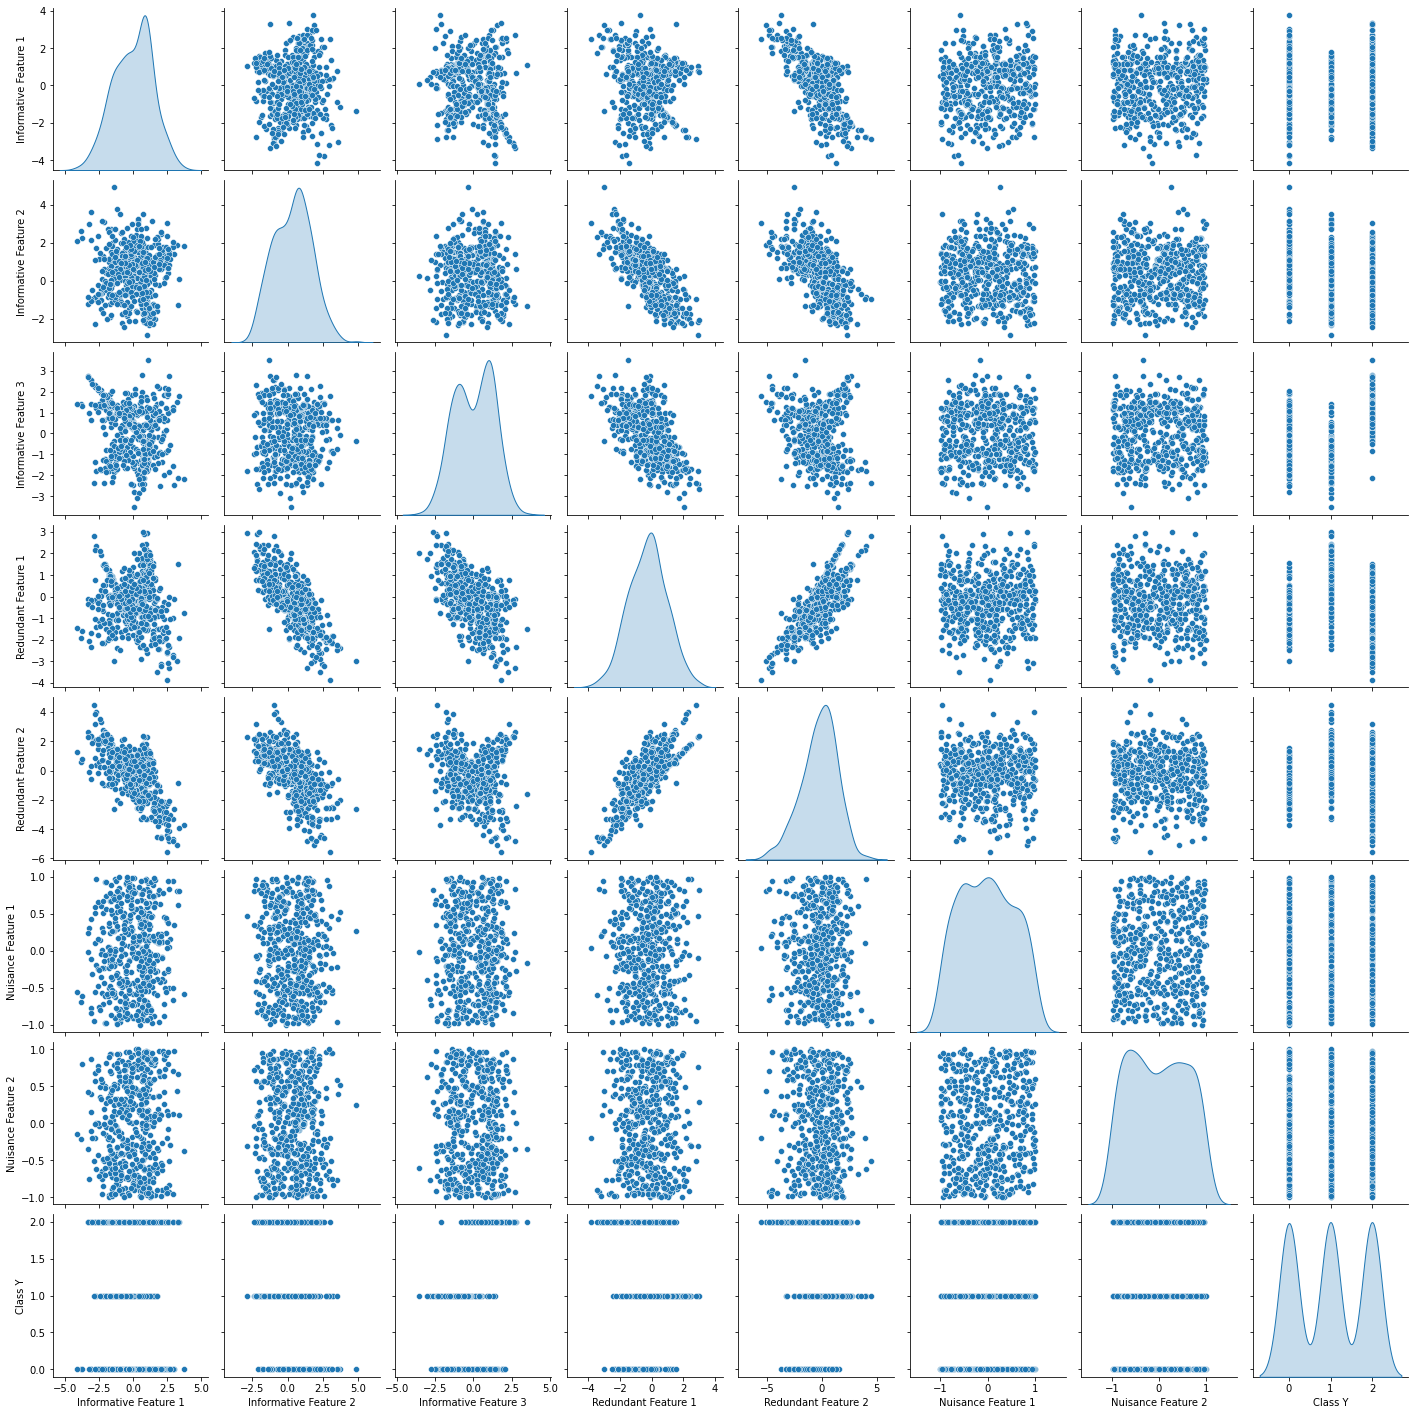

In [12]:
graph = sns.pairplot(classification_set, diag_kind="kde", kind="scatter")
plt.savefig("pairplot_c.png")
plt.show()

In [13]:
#testing make_regression
#we are making sure we create 3 features, where all 3 features are INFORMATIVE features
#we will create a function to create the redundant features, since make_regression doesn't have an n_redundant field like make_classification
X_reg, y_reg = make_regression(n_samples= 500, n_features= 3, n_informative=3, shuffle=False)

In [14]:
X_rf, info = generate_redundant_features(X[X.columns[0:3]], 2)

In [15]:
# Task: use prev X, X_NF + linear combination (with noise to generate y for regression)
regression_set = pd.concat([X[X.columns[0:3]], X_rf, X_NF], axis=1)
coefs = np.random.rand(3)
print(f"coefs: {coefs}")

regression_set["Y"] = np.dot(X[X.columns[0:3]], coefs) + np.random.normal(loc=0, scale=1, size=500)
regression_set.head()

coefs: [0.78413391 0.84618602 0.87819561]


,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Y
0,-1.033466,0.482046,-0.650751,1.179468,0.391172,-0.452855,0.638833,-0.665413
1,1.380414,0.971903,-0.106221,2.427386,2.297155,-0.484249,0.088157,3.199887
2,1.285359,1.078020,-0.861892,0.510595,3.498387,-0.909670,-0.583941,1.184897
3,2.265234,1.375849,-1.973636,1.370093,2.245253,-0.406595,0.263806,1.973625
4,0.295323,1.826752,-1.841281,0.818301,1.248909,0.081444,-0.867875,0.273718


In [16]:
regression_set.describe()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.007479,0.346894,0.016629,0.206168,0.159158,-0.017103,-0.024526,0.298341
std,1.432295,1.334535,1.274984,1.381935,1.658286,0.557527,0.599653,2.020090
min,-4.140725,-2.865202,-3.537683,-4.405421,-4.165435,-0.999219,-0.994280,-6.429020
25%,-1.071589,-0.714099,-0.990089,-0.708446,-1.018804,-0.485564,-0.568990,-0.937152
50%,0.071775,0.459821,0.169206,0.226595,0.071221,-0.034951,-0.024987,0.201497
75%,1.013050,1.302426,1.069653,1.174863,1.293187,0.454114,0.484938,1.436828
max,3.773431,4.906698,3.523343,4.166131,5.411135,0.999199,0.999404,7.383701


In [17]:
regression_set.corr()

,Informative Feature 1,Informative Feature 2,Informative Feature 3,Redundant Feature 1,Redundant Feature 2,Nuisance Feature 1,Nuisance Feature 2,Y
Informative Feature 1,1.000000,-0.023338,-0.195169,0.328556,0.277039,0.072693,0.032002,0.435196
Informative Feature 2,-0.023338,1.000000,-0.051019,0.604573,0.741304,-0.036786,0.017492,0.488938
Informative Feature 3,-0.195169,-0.051019,1.000000,-0.148109,-0.104051,-0.007780,-0.002511,0.443759
Redundant Feature 1,0.328556,0.604573,-0.148109,1.000000,0.546823,0.023695,0.042037,0.415647
Redundant Feature 2,0.277039,0.741304,-0.104051,0.546823,1.000000,0.017871,0.042631,0.485296
Nuisance Feature 1,0.072693,-0.036786,-0.007780,0.023695,0.017871,1.000000,0.056135,0.030794
Nuisance Feature 2,0.032002,0.017492,-0.002511,0.042037,0.042631,0.056135,1.000000,0.023713
Y,0.435196,0.488938,0.443759,0.415647,0.485296,0.030794,0.023713,1.000000


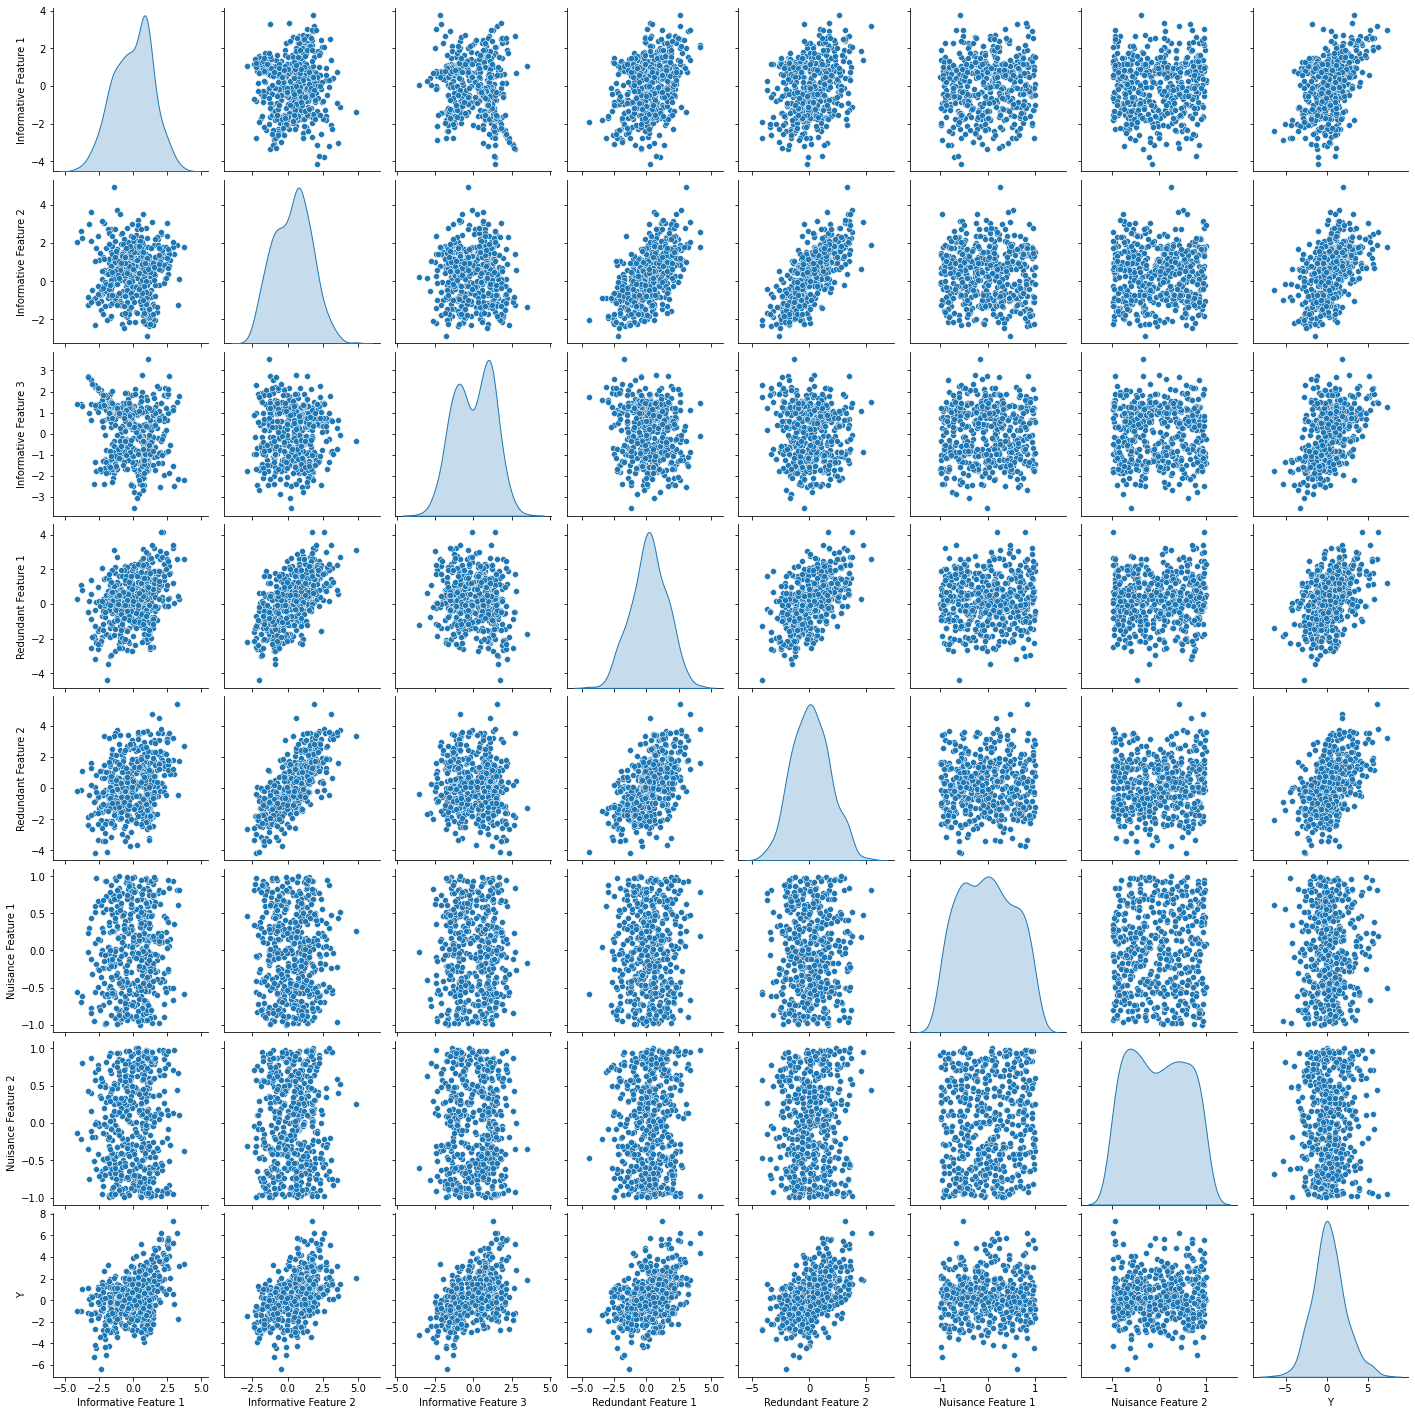

In [18]:
graph = sns.pairplot(regression_set, diag_kind="kde", kind="scatter")
plt.savefig("pairplot_r.png")
plt.show()

In [19]:
#export to csv for consistency
classification_set.to_csv("./classification_set.csv")
regression_set.to_csv("./regression_set.csv")

In [20]:
#we want to generate synthetic data
#specify:
#-num_rows: number of rows
#-num_informative_features: number of informative features
#-num_redundant_features: number of redundant features (random linear combinations of informative features)
#-num_nuisance_features: uncorrelated features drawn from [-1, 1]

#return:
# a num_rows x (num_informative_features+num_redundant_features+num_nuisance_features + 1 [for target variable]) dataframe
def generate_synthetic_data(num_rows, num_informative_features, num_redundant_features, num_nuisance_features):
    return_df = pd.DataFrame()
    
    return 